# Segmentación de Imágenes Usando CLAHE y Canny

Este script realiza una segmentación avanzada combinando el ecualizador de histograma adaptativo limitado por contraste (CLAHE) con la detección de bordes mediante el algoritmo de Canny.

## Técnica de Segmentación

- **CLAHE**: Mejora el contraste en áreas locales de la imagen, lo que facilita la distinción de bordes y detalles importantes en la siguiente etapa de procesamiento.
- **Canny**: Detecta bordes en la imagen que ahora posee un contraste mejorado, produciendo una segmentación precisa de las características importantes.

## Procedimiento

1. Convertir la imagen a escala de grises para procesarla.
2. Aplicar CLAHE para mejorar el contraste localmente.
3. Suavizar la imagen para reducir el ruido.
4. Utilizar Canny para detectar bordes.
5. Realizar operaciones morfológicas para mejorar la integridad de los bordes detectados.
6. Dibujar contornos sobre la imagen original para visualizar la segmentación.


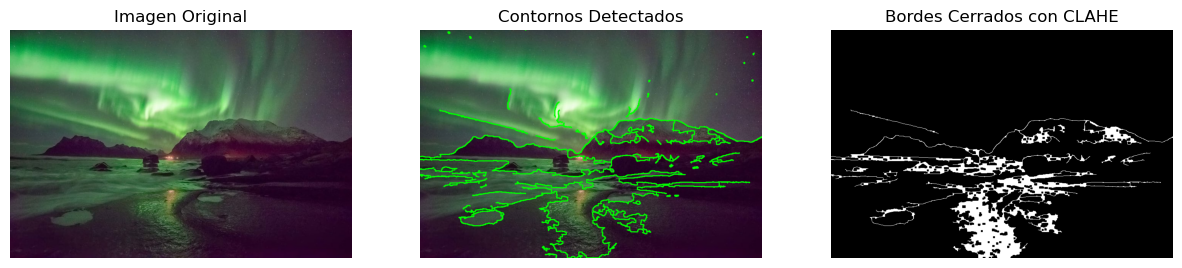

In [46]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargar la imagen original
imagen_original = cv2.imread('../noise.jpg')

# Verificar si la imagen se ha cargado correctamente
if imagen_original is None:
    print("Error: No se pudo cargar la imagen. Verifica la ruta.")
else:
    # Convertir la imagen a RGB para visualización
    imagen_rgb = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB)

    # Convertir la imagen a escala de grises para procesamiento
    imagen_grises = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2GRAY)

    # Aplicar CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    imagen_clahe = clahe.apply(imagen_grises)

    # Suavizar la imagen con un filtro Gaussiano
    imagen_suavizada = cv2.GaussianBlur(imagen_clahe, (5, 5), 0)

    # Detectar bordes con el algoritmo de Canny
    bordes_canny = cv2.Canny(imagen_suavizada, 50, 150)

    # Aplicar operaciones morfológicas para cerrar huecos en los bordes
    kernel_morfologico = np.ones((5, 5), np.uint8)
    bordes_cerrados = cv2.morphologyEx(bordes_canny, cv2.MORPH_CLOSE, kernel_morfologico)

    # Encontrar y dibujar contornos sobre la imagen RGB
    contornos, _ = cv2.findContours(bordes_cerrados, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    imagen_contornos = imagen_rgb.copy()
    cv2.drawContours(imagen_contornos, contornos, -1, (0, 255, 0), 2)

    # Eliminar contornos pequeños para limpiar la imagen
    for contorno in contornos:
        if cv2.contourArea(contorno) < 50:
            cv2.drawContours(bordes_cerrados, [contorno], 0, (0, 0, 0), -1)

    # Visualizar los resultados
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(imagen_rgb)
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(imagen_contornos)
    plt.title('Contornos Detectados')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(bordes_cerrados, cmap='gray')
    plt.title('Bordes Cerrados con CLAHE')
    plt.axis('off')

    plt.show()


# Segmentación de Imágenes con Técnicas de Umbralización

Este script aplica diferentes métodos de segmentación por **umbralización** para analizar una imagen en escala de grises. La umbralización es una técnica simple pero efectiva para convertir una imagen en escala de grises a una imagen binaria, donde los píxeles se dividen en dos categorías: blanco o negro.

## Métodos de Umbralización Utilizados

1. **Umbralización Simple**: Se aplica un valor umbral fijo para decidir si un píxel se convierte en blanco o negro. En este caso, se ha utilizado un umbral de 100.
   
2. **Umbralización por Otsu**: Es un método automático que encuentra el valor de umbral óptimo dividiendo el histograma en dos clases de píxeles, minimizando la varianza intra-clase.

3. **Umbralización Adaptativa**: A diferencia de los métodos anteriores, el umbral se calcula para pequeñas regiones de la imagen, lo que permite manejar mejor cambios de iluminación locales.




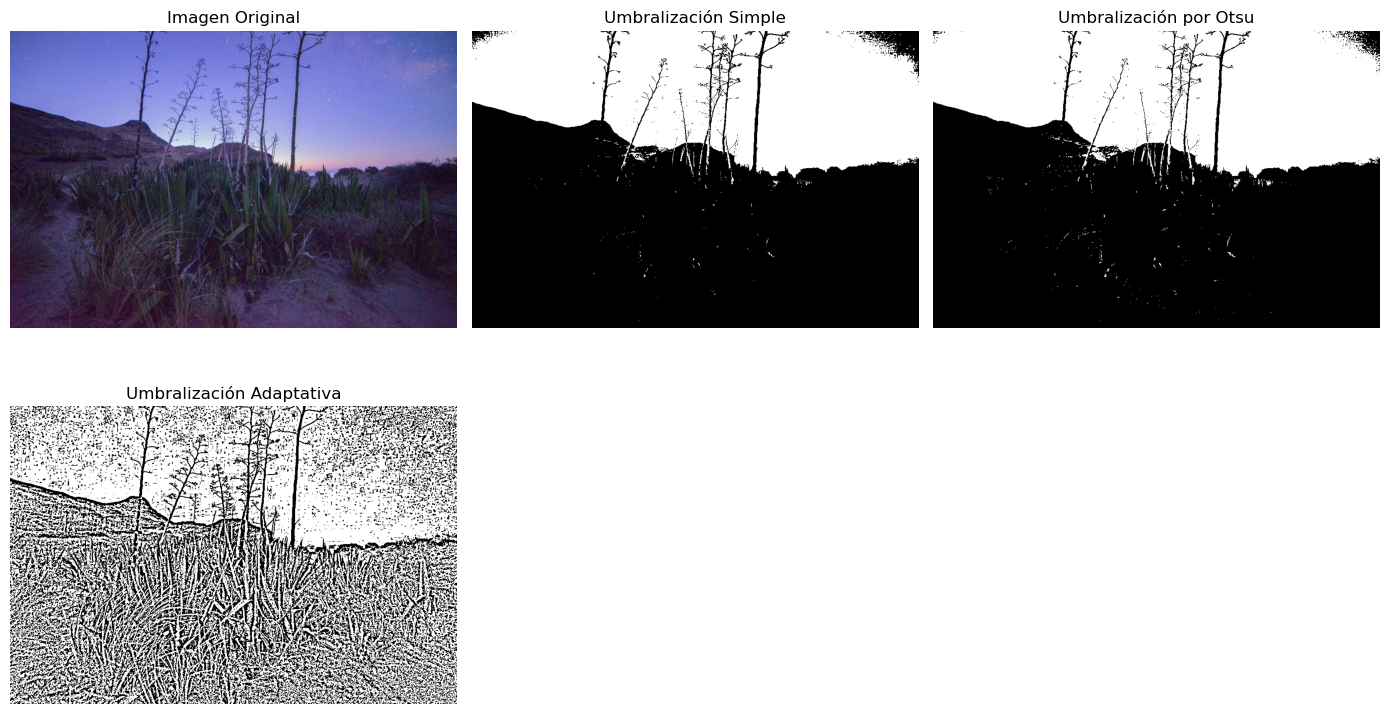

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen original
imagen_original = cv2.imread('../desierto.jpg')

# Convertir la imagen a escala de grises
imagen_grises = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2GRAY)

# Calcular el histograma de la imagen en escala de grises
histograma_grises = cv2.calcHist([imagen_grises], [0], None, [256], [0, 256])

# Aplicar diferentes métodos de umbralización
_, umbral_simple = cv2.threshold(imagen_grises, 100, 255, cv2.THRESH_BINARY)
_, umbral_otsu = cv2.threshold(imagen_grises, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
umbral_adaptativo = cv2.adaptiveThreshold(imagen_grises, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Mostrar la imagen original, las imágenes umbralizadas y el histograma
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(umbral_simple, cmap='gray')
plt.title('Umbralización Simple')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(umbral_otsu, cmap='gray')
plt.title('Umbralización por Otsu')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(umbral_adaptativo, cmap='gray')
plt.title('Umbralización Adaptativa')
plt.axis('off')

plt.tight_layout()
plt.show()


# Segmentación de Imágenes con K-Means

Este script utiliza el algoritmo de segmentación K-Means para agrupar los colores de una imagen en un número definido de clusters. La segmentación de imágenes es una técnica utilizada en procesamiento de imágenes para dividir una imagen en partes o regiones significativas, facilitando su análisis y comprensión.

## Descripción del Algoritmo

### K-Means Clustering

K-Means es un método de aprendizaje no supervisado que busca agrupar datos en `k` grupos. En el contexto de la segmentación de imágenes, cada píxel de la imagen se representa en un espacio de color, y el algoritmo agrupa los píxeles similares en clusters basados en la distancia a los centroides de cada cluster.

### Pasos del Algoritmo

1. **Leer la imagen**: Cargar la imagen de entrada.
2. **Convertir a RGB**: Cambiar el formato de la imagen de BGR a RGB.
3. **Reformatear la imagen**: Convertir la imagen a un arreglo 2D para aplicar K-Means.
4. **Definir número de clusters**: Establecer cuántos colores se quieren en la imagen segmentada.
5. **Aplicar K-Means**: Ejecutar el algoritmo K-Means sobre los píxeles de la imagen.
6. **Reasignar colores**: Asignar a cada píxel el color del centroide de su cluster.
7. **Mostrar resultados**: Visualizar la imagen original y la imagen segmentada.



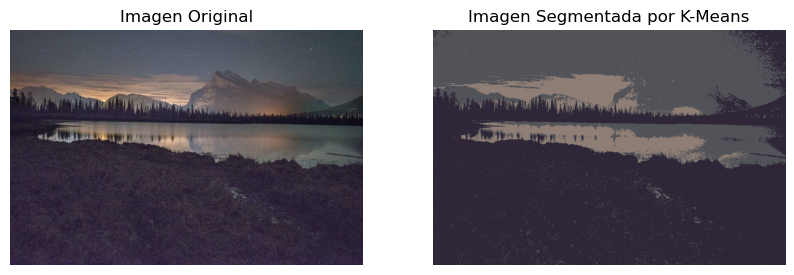

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen
image_path = '../paiaje2.jpg'
original_image = cv2.imread(image_path)

# Convertir la imagen a formato RGB
rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Reformatear la imagen a un arreglo 2D y convertir a tipo de datos de punto flotante
image_2d = rgb_image.reshape((-1, 3)).astype(np.float32)

# Definir el número de clusters (k)
num_clusters = 3

# Aplicar K-Means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, cluster_centers = cv2.kmeans(image_2d, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convertir los centros de los clusters a valores enteros
cluster_centers = np.uint8(cluster_centers)

# Asignar a cada píxel el color del centroide de su cluster
segmented_image = cluster_centers[labels.flatten()]
segmented_image = segmented_image.reshape(rgb_image.shape)

# Mostrar imágenes
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Imagen Segmentada por K-Means')
plt.axis('off')

plt.show()


# Segmentación de Imágenes por Histograma

Este script utiliza la técnica de segmentación basada en histogramas para agrupar los píxeles de una imagen en diferentes intervalos de intensidad. La segmentación de imágenes es una técnica fundamental en procesamiento de imágenes, que permite dividir una imagen en partes significativas para facilitar su análisis.

## Descripción del Algoritmo

### Segmentación por Histograma

La segmentación por histograma implica dividir la imagen en varios intervalos de intensidad y asignar a cada píxel un valor basado en el intervalo en el que se encuentra. Este método es útil para identificar y segmentar características específicas en una imagen.

### Pasos del Algoritmo

1. **Leer la imagen**: Cargar la imagen de entrada.
2. **Convertir a escala de grises**: Cambiar el formato de la imagen a escala de grises para facilitar el análisis de intensidad.
3. **Calcular el histograma**: Generar un histograma que muestra la frecuencia de cada nivel de intensidad en la imagen.
4. **Definir intervalos**: Establecer el número de intervalos para la segmentación.
5. **Calcular umbrales**: Calcular los umbrales para cada intervalo de intensidad.
6. **Segmentar la imagen**: Asignar a cada píxel un valor basado en el intervalo correspondiente.
7. **Mostrar resultados**: Visualizar la imagen original, el histograma y la imagen segmentada.




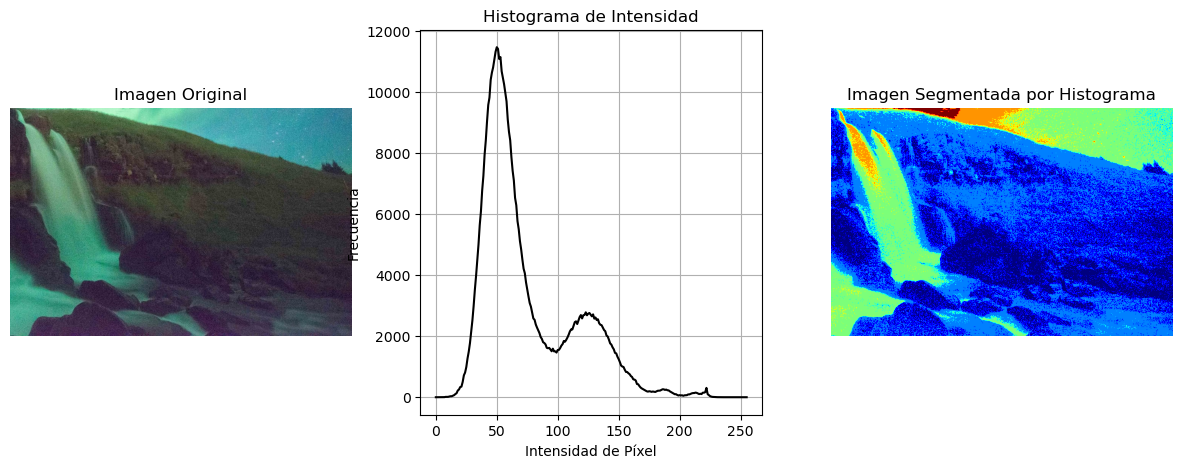

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen en formato BGR
image_path = '../paisaje.jpg'
original_image = cv2.imread(image_path)

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Calcular el histograma de intensidad
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Definir el número de intervalos para la segmentación
num_intervals = 5

# Calcular los umbrales basados en los intervalos
thresholds = np.linspace(0, 255, num_intervals + 1, dtype=np.uint8)

# Crear una matriz para la imagen segmentada
segmented_image = np.zeros_like(gray_image, dtype=np.uint8)

# Segmentar la imagen
for i in range(num_intervals):
    lower_bound = thresholds[i]
    upper_bound = thresholds[i + 1]
    segmented_image[(gray_image >= lower_bound) & (gray_image < upper_bound)] = i

# Mostrar imágenes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.plot(histogram, color='black')
plt.title('Histograma de Intensidad')
plt.xlabel('Intensidad de Píxel')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.imshow(segmented_image, cmap='jet')
plt.title('Imagen Segmentada por Histograma')
plt.axis('off')

plt.show()


# Detección de Bordes con el Algoritmo Canny

Este proyecto utiliza el algoritmo de detección de bordes Canny para identificar bordes en una imagen. La detección de bordes es una técnica fundamental en procesamiento de imágenes, que permite resaltar características importantes en una imagen, como contornos y límites.

## Descripción del Algoritmo

### Detección de Bordes Canny

El algoritmo Canny es un método popular para la detección de bordes que se basa en varios pasos:

1. **Conversión a Escala de Grises**: Se convierte la imagen a escala de grises para facilitar el procesamiento.
2. **Suavizado de la Imagen**: Se aplica un filtro gaussiano para reducir el ruido.
3. **Cálculo del Gradiente**: Se calculan los gradientes de intensidad en la imagen.
4. **Supresión de No Máximos**: Se eliminan los píxeles que no son máximos locales en la dirección del gradiente.
5. **Umbralización Histerética**: Se aplican dos umbrales para determinar los bordes fuertes y débiles, y se conectan los bordes débiles a los bordes fuertes.

### Pasos del Algoritmo

1. **Cargar la Imagen**: Cargar la imagen de entrada.
2. **Convertir a Escala de Grises**: Cambiar el formato de la imagen a escala de grises.
3. **Aplicar Canny**: Ejecutar el algoritmo Canny con diferentes valores de sigma para comparar resultados.
4. **Mostrar Resultados**: Visualizar la imagen original, la ground truth simulada y los resultados de la detección de bordes.



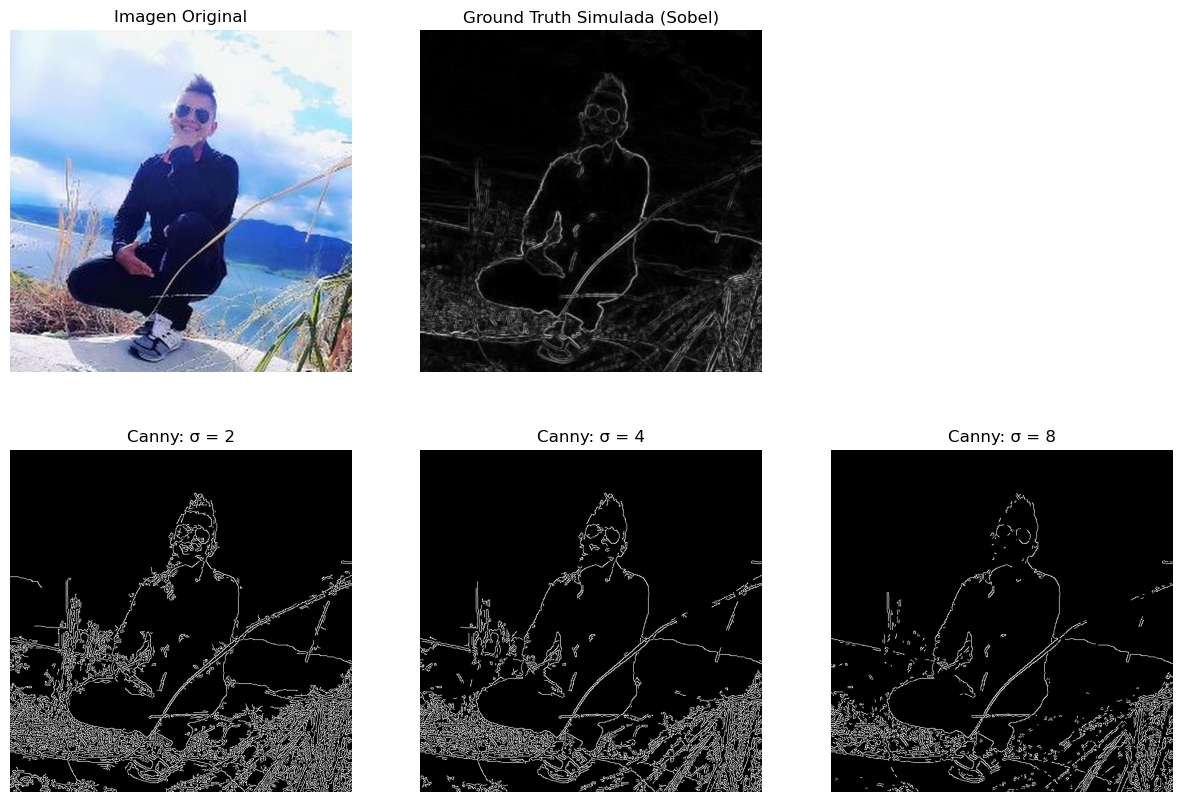

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen proporcionada
image_path = '../perfil.jpg'
original_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises para la detección de bordes

# Aplicar detector de bordes Canny con diferentes valores de sigma
edges_sigma_2 = cv2.Canny(gray_image, 50, 150, apertureSize=3)
edges_sigma_4 = cv2.Canny(gray_image, 100, 200, apertureSize=3)
edges_sigma_8 = cv2.Canny(gray_image, 200, 250, apertureSize=3)

# Crear un gráfico para mostrar los resultados
plt.figure(figsize=(15, 10))

# Imagen original
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

# Ground truth (simulada como una versión Sobel)
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.sqrt(sobel_x**2 + sobel_y**2)
plt.subplot(2, 3, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Ground Truth Simulada (Sobel)')
plt.axis('off')

# Canny Sigma 2
plt.subplot(2, 3, 4)
plt.imshow(edges_sigma_2, cmap='gray')
plt.title('Canny: σ = 2')
plt.axis('off')

# Canny Sigma 4
plt.subplot(2, 3, 5)
plt.imshow(edges_sigma_4, cmap='gray')
plt.title('Canny: σ = 4')
plt.axis('off')

# Canny Sigma 8
plt.subplot(2, 3, 6)
plt.imshow(edges_sigma_8, cmap='gray')
plt.title('Canny: σ = 8')
plt.axis('off')

plt.show()


# Segmentación de Textura en Imágenes

Este proyecto realiza la segmentación de imágenes utilizando la técnica de Matriz de Coocurrencia de Niveles de Gris (GLCM) para analizar la textura de diferentes regiones en una imagen.

## Descripción

La segmentación se lleva a cabo de la siguiente manera:

1. **Cargar la imagen**: Se carga una imagen de entrada.
2. **Seleccionar regiones**: Se definen regiones específicas de interés en la imagen, en este caso, hojas y la cara de un lobo.
3. **Calcular GLCM**: Para cada región seleccionada, se convierte a escala de grises y se calcula la GLCM.
4. **Extraer características**: Se extraen características texturales como contraste, disimilitud, homogeneidad, ASM, energía y correlación.
5. **Mostrar resultados**: Se presenta la información de las características en forma de tabla.

## Observaciones

La GLCM es útil para el análisis de texturas en imágenes y puede ser aplicada en diversas áreas como la medicina, la agricultura y la clasificación de imágenes.


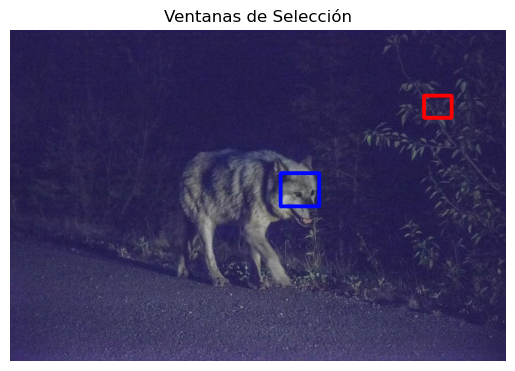

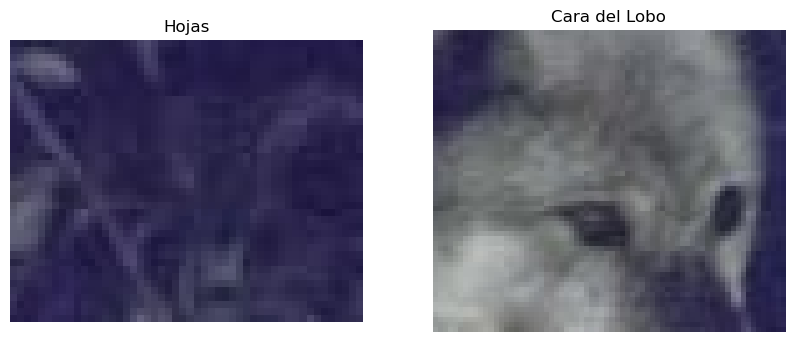

+-------------------+------------+-----------------+
| Características   |      Hojas |   Cara del Lobo |
+===================+============+=================+
| Contraste         | 268.123333 |      791.695641 |
+-------------------+------------+-----------------+
| Disimilitud       |  11.564444 |       20.738205 |
+-------------------+------------+-----------------+
| Homogeneidad      |   0.119021 |        0.060721 |
+-------------------+------------+-----------------+
| ASM               |   0.001326 |        0.000256 |
+-------------------+------------+-----------------+
| Energía           |   0.036409 |        0.015991 |
+-------------------+------------+-----------------+
| Correlación       |   0.175601 |        0.666559 |
+-------------------+------------+-----------------+


In [55]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from tabulate import tabulate

# Cargar la imagen
image_path = '../lobo.jpg'
image = cv2.imread(image_path)

# Dibujar rectángulos en la imagen
window = cv2.rectangle(image.copy(), (750, 120), (800, 160), (0, 0, 255), 5)
window = cv2.rectangle(window, (490, 260), (560, 320), (255, 5, 0), 5)
plt.imshow(cv2.cvtColor(window, cv2.COLOR_BGR2RGB))
plt.title('Ventanas de Selección')
plt.axis('off')
plt.show()

# Seleccionar regiones de las hojas y la cara del lobo
leaves_region = image[120:160, 750:800]
wolf_face_region = image[260:320, 490:560]

# Mostrar las regiones seleccionadas
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(leaves_region, cv2.COLOR_BGR2RGB))
ax[0].set_title('Hojas')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(wolf_face_region, cv2.COLOR_BGR2RGB))
ax[1].set_title('Cara del Lobo')
ax[1].axis('off')

plt.show()

# MATRIZ DE COOCURRENCIA (Gray-Level Co-occurrence Matrix - GLCM)
headers = ['Características', 'Hojas', 'Cara del Lobo']
contrast, dissimilarity, homogeneity, asm, energy, correlation = [], [], [], [], [], []

# Lista de parches
patches = [leaves_region, wolf_face_region]

# Calcular propiedades de la GLCM para cada región
for patch in patches:
    gray_image = cv2.cvtColor(patch, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises
    glcm = graycomatrix(gray_image, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
    
    contrast.append(graycoprops(glcm, 'contrast')[0, 0])
    dissimilarity.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    homogeneity.append(graycoprops(glcm, 'homogeneity')[0, 0])
    asm.append(graycoprops(glcm, 'ASM')[0, 0])
    energy.append(graycoprops(glcm, 'energy')[0, 0])
    correlation.append(graycoprops(glcm, 'correlation')[0, 0])

# Preparar los datos para mostrar
data = [
    ['Contraste', contrast[0], contrast[1]],
    ['Disimilitud', dissimilarity[0], dissimilarity[1]],
    ['Homogeneidad', homogeneity[0], homogeneity[1]],
    ['ASM', asm[0], asm[1]],
    ['Energía', energy[0], energy[1]],
    ['Correlación', correlation[0], correlation[1]],
]

# Mostrar la tabla
print(tabulate(data, headers=headers, floatfmt=".6f", tablefmt="grid"))


# Segmentación de Imágenes con Local Binary Patterns (LBP)

Este script realiza segmentación de texturas en una imagen utilizando la técnica **Local Binary Patterns (LBP)**. Esta técnica es ampliamente utilizada para capturar patrones locales de textura y es robusta frente a variaciones en la iluminación.

## Descripción

1. **Conversión a Escala de Grises**: La imagen se convierte a escala de grises, ya que LBP opera en imágenes monocromáticas.
2. **Aplicación de LBP**: Se aplica el algoritmo LBP utilizando un radio y un número de vecinos para generar una imagen de texturas.
3. **Cálculo del Histograma**: Se genera un histograma que representa los patrones LBP en la imagen, lo que nos permite analizar la textura segmentada.
4. **Visualización**: Se muestran tanto la imagen original como la segmentada por LBP, junto con su histograma normalizado.


## Resultados

El histograma generado representa la frecuencia de los diferentes patrones de textura en la imagen, lo que puede ser útil en diversas aplicaciones de clasificación y segmentación de imágenes.



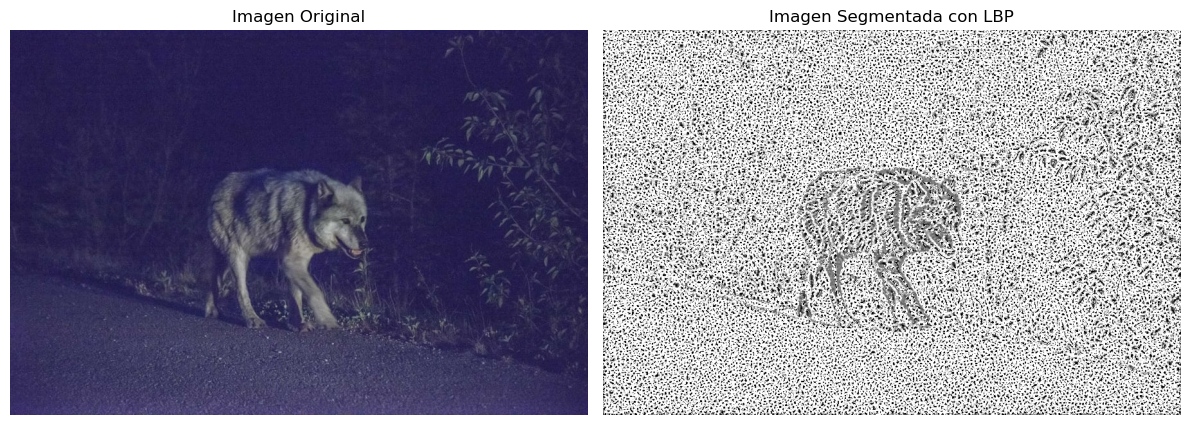

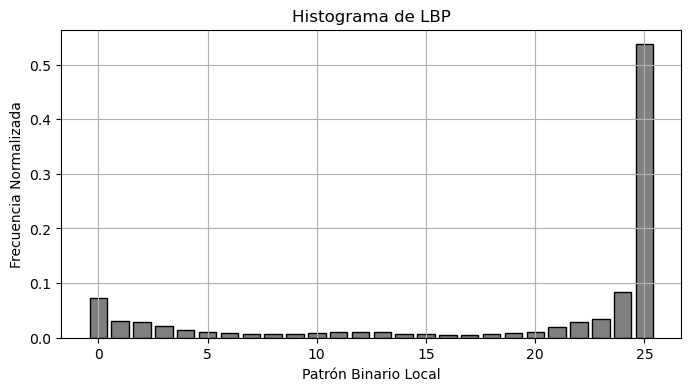

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# Leer la imagen original
imagen = cv2.imread('../lobo.jpg')

# Convertir a escala de grises
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Definir los parámetros para LBP
radio = 3  # Radio del círculo
puntos_vecinos = 8 * radio  # Número de puntos vecinos

# Aplicar el patrón binario local (LBP)
lbp = local_binary_pattern(imagen_gris, puntos_vecinos, radio, method='uniform')

# Calcular el histograma de LBP
histograma_lbp, _ = np.histogram(lbp.ravel(), bins=np.arange(0, puntos_vecinos + 3), range=(0, puntos_vecinos + 2))

# Normalizar el histograma
histograma_lbp = histograma_lbp.astype("float")
histograma_lbp /= (histograma_lbp.sum() + 1e-7)

# Mostrar la imagen original y la imagen LBP
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
ax[0].set_title('Imagen Original')
ax[0].axis('off')

ax[1].imshow(lbp, cmap='gray')
ax[1].set_title('Imagen Segmentada con LBP')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Mostrar el histograma de LBP
plt.figure(figsize=(8, 4))
plt.bar(np.arange(0, puntos_vecinos + 2), histograma_lbp, width=0.8, color='gray', edgecolor='black')
plt.title('Histograma de LBP')
plt.xlabel('Patrón Binario Local')
plt.ylabel('Frecuencia Normalizada')
plt.grid(True)
plt.show()


# Transformación de Imágenes con Polinomios de Chebyshev

Este proyecto aplica una transformación matemática basada en **polinomios de Chebyshev** a imágenes en escala de grises. Aunque no es una técnica de segmentación tradicional, puede ser útil para resaltar características de las imágenes que pueden facilitar el análisis o la segmentación posterior.

## Descripción del Script

El script transforma una imagen utilizando **polinomios de Chebyshev** de grado `n` (5 por defecto). Esta transformación matemática es útil para representar variaciones suaves en los datos y puede ser aplicada para analizar o modificar imágenes en escala de grises.

### Flujo del Script

1. **Carga de la Imagen**: 
   - Se carga una imagen en escala de grises.

2. **Normalización de la Imagen**: 
   - Los valores de los píxeles se normalizan para que estén en el rango [-1, 1], el dominio necesario para los polinomios de Chebyshev.

3. **Transformación de Chebyshev**: 
   - Se aplica un polinomio de Chebyshev de grado 5 (por defecto) a la imagen normalizada.

4. **Visualización**:
   - Se muestran tanto la imagen original como la imagen transformada, comparando los efectos de la transformación.

## Uso

1. Cargar la imagen en escala de grises.
2. Aplicar la función de transformación con los polinomios de Chebyshev.
3. Visualizar los resultados.


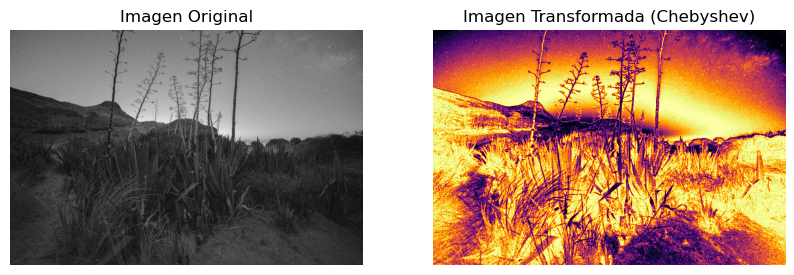

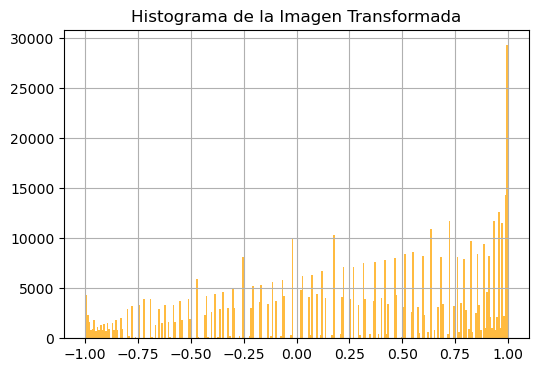

In [65]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.special import eval_chebyt

# Función para aplicar polinomios de Chebyshev a una imagen de forma vectorizada
def chebyshev_transform(image, degree=5):
  
    # Aplicamos la función de Chebyshev de manera vectorizada
    cheb_image = eval_chebyt(degree, image)
    
    return cheb_image

# Cargar la imagen en escala de grises
image = cv2.imread('../desierto.jpg', cv2.IMREAD_GRAYSCALE)

# Normalizar la imagen para que los valores estén entre -1 y 1 (dominio de Chebyshev)
image_normalized = 2 * (image / 255.0) - 1

# Aplicar la transformada de Chebyshev
cheb_transformed_image = chebyshev_transform(image_normalized, degree=5)

# Mostrar la imagen original y la transformada
plt.figure(figsize=(10, 5))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Imagen transformada (Chebyshev)
plt.subplot(1, 2, 2)
plt.imshow(cheb_transformed_image, cmap='inferno')  # Usamos 'inferno' para mejor visualización
plt.title('Imagen Transformada (Chebyshev)')
plt.axis('off')

plt.show()

# Mostrar el histograma de la imagen transformada
plt.figure(figsize=(6, 4))
plt.hist(cheb_transformed_image.ravel(), bins=256, color='orange', alpha=0.75)
plt.title('Histograma de la Imagen Transformada')
plt.grid(True)
plt.show()


# Análisis de Imágenes con Transformada Wavelet Discreta (DWT)

Este proyecto aplica la **Transformada Wavelet Discreta (DWT)** utilizando la wavelet 'haar' a imágenes en escala de grises, descomponiendo la imagen en sub-bandas de frecuencias. La DWT es útil para análisis multiescala, compresión de imágenes, y detección de detalles.

## Descripción

El script toma una imagen en escala de grises y aplica la **Transformada Wavelet Discreta** para dividirla en cuatro sub-bandas:

- **LL**: Aproximación (baja frecuencia), que captura la mayor parte de la información visual de la imagen.
- **LH**: Detalles horizontales (alta frecuencia horizontal).
- **HL**: Detalles verticales (alta frecuencia vertical).
- **HH**: Detalles diagonales (alta frecuencia diagonal).

### ¿Qué hace este script?

1. Carga una imagen en escala de grises.
2. Aplica la DWT utilizando la wavelet 'haar' para descomponer la imagen en diferentes componentes.
3. Muestra las sub-bandas de la imagen descompuesta en un gráfico de 2x2.

### Ventajas

- **Compresión de imágenes**: La DWT permite reducir la cantidad de datos necesarios para representar una imagen, manteniendo gran parte de su información visual.
  
- **Análisis multiescala**: Se puede analizar la imagen en diferentes niveles de detalle, capturando características como bordes y texturas.
  
- **Reducción de ruido**: La DWT es útil para filtrar ruido en imágenes, manteniendo detalles importantes.

### Ejemplo de uso

```python
image = cv2.imread('mi_imagen.jpg', cv2.IMREAD_GRAYSCALE)
LL, LH, HL, HH = dwt_transform(image, wavelet='haar')


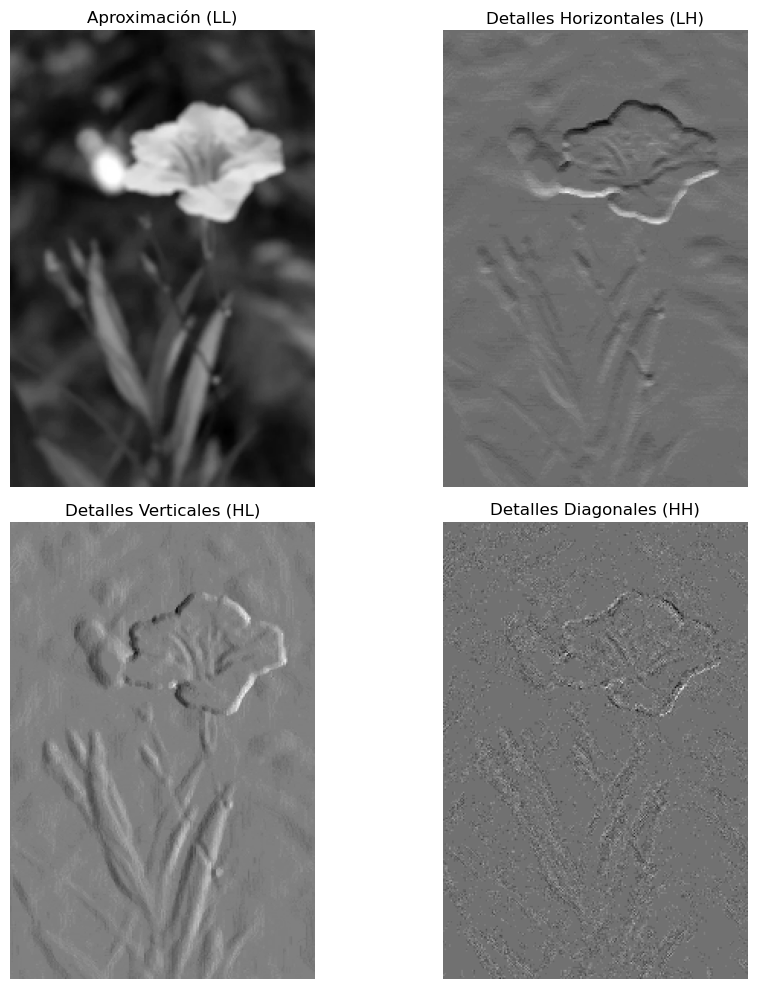

In [97]:
import numpy as np
import cv2
import pywt
import matplotlib.pyplot as plt

# Función para realizar la Transformada Wavelet Discreta (DWT) a una imagen
def dwt_transform(image, wavelet='haar'):
    coeffs2 = pywt.dwt2(image, wavelet)
    LL, (LH, HL, HH) = coeffs2
    return LL, LH, HL, HH

# Cargar la imagen en escala de grises
image = cv2.imread('../flor.jpg', cv2.IMREAD_GRAYSCALE)

# Verificamos si la imagen fue cargada correctamente
if image is None:
    raise ValueError("No se pudo cargar la imagen. Asegúrate de que el archivo exista y el path es correcto.")

# Aplicar la Transformada Wavelet Discreta
LL, LH, HL, HH = dwt_transform(image, wavelet='haar')

# Configuración de la figura y visualización
plt.figure(figsize=(10, 10))

# Sub-banda de aproximación LL (baja frecuencia)
plt.subplot(2, 2, 1)
plt.imshow(LL, cmap='gray')
plt.title('Aproximación (LL)')
plt.axis('off')

# Sub-banda de detalles horizontales LH (alta frecuencia horizontal)
plt.subplot(2, 2, 2)
plt.imshow(LH, cmap='gray')
plt.title('Detalles Horizontales (LH)')
plt.axis('off')

# Sub-banda de detalles verticales HL (alta frecuencia vertical)
plt.subplot(2, 2, 3)
plt.imshow(HL, cmap='gray')
plt.title('Detalles Verticales (HL)')
plt.axis('off')

# Sub-banda de detalles diagonales HH (alta frecuencia diagonal)
plt.subplot(2, 2, 4)
plt.imshow(HH, cmap='gray')
plt.title('Detalles Diagonales (HH)')
plt.axis('off')

# Mostrar la figura con las sub-bandas
plt.tight_layout()
plt.show()


# Segmentación por Superpíxeles (SLIC)

Este script implementa la segmentación de imágenes utilizando el algoritmo SLIC (Simple Linear Iterative Clustering) para dividir la imagen en superpíxeles. El método ayuda a simplificar el análisis de imágenes al agrupar píxeles similares.

## Descripción del Código

El código realiza las siguientes tareas:

1. **Carga de Imagen**: Utiliza OpenCV para cargar la imagen desde la ruta especificada.
2. **Segmentación SLIC**: Aplica el algoritmo SLIC para segmentar la imagen en superpíxeles.
3. **Visualización**: Muestra la imagen original y la imagen segmentada utilizando Matplotlib.

### Funcionamiento del Código

- `n_segments`: Controla el número de segmentos deseados en la imagen.
- `compactness`: Determina la forma de los superpíxeles; un valor más alto produce formas más compactas.
- `start_label`: Establece el inicio de las etiquetas de segmento.

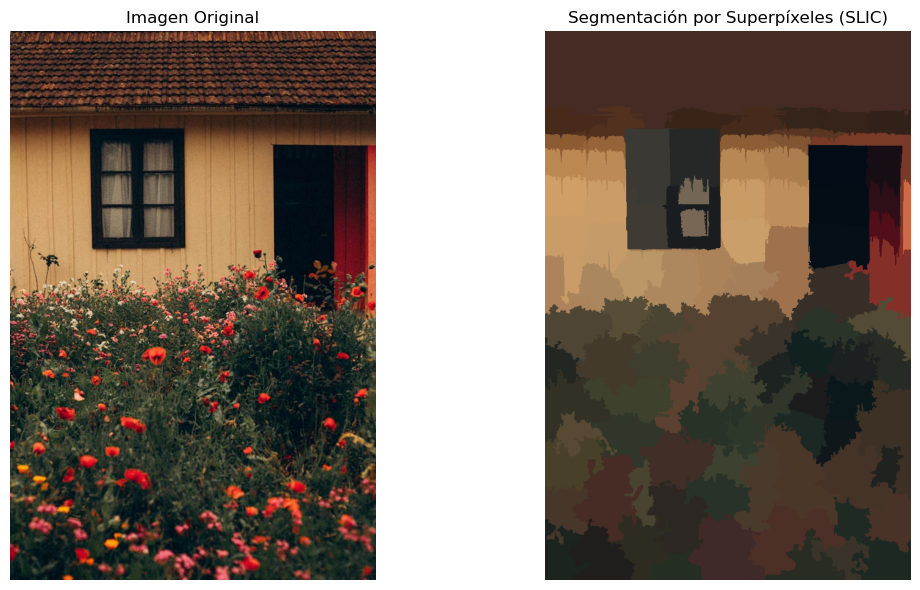

In [110]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import segmentation, color

# Cargar imagen usando OpenCV
img = cv2.imread('../jardin.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB

# Aplicar SLIC
segments = segmentation.slic(img_rgb, n_segments=200, compactness=10, start_label=1)

# Crear una imagen de salida para visualizar la segmentación
segmented_image = color.label2rgb(segments, img_rgb, kind='avg')

# Mostrar resultados
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Mostrar imagen original
ax[0].imshow(img_rgb)
ax[0].set_title('Imagen Original')
ax[0].axis('off')

# Mostrar imagen segmentada
ax[1].imshow(segmented_image)
ax[1].set_title('Segmentación por Superpíxeles (SLIC)')
ax[1].axis('off')

plt.tight_layout()
plt.show()
